## 3-6 Transformer

我们已经学习了传统的CNN、RNN模型，他们各自有自己擅长的领域和场景。而Transformer的出现，却几乎一统整个机器学习领域，它就像一个无敌的变形金刚，横扫NLP领域的同时也在图像、语音等其他领域证明了自己的价值。

要了解Transformer，首先要从它的核心attention机制说起。

### 1. attention机制

作为Transformer的核心，attention机制的重要性毋庸置疑。NLP领域的几大重要进展Transformer、BERT、GPT等等，全是在它的基础上发展起来的。

我们先来看看在机器学习里它是怎么用的。

聚焦到AI翻译领域，当我们顺序输入一句话，它是如何做到通过上下文，动态改变翻译结果的呢？

![](../../notebook/3-6/assets/t-1.png)

只考虑自己的权重，games本意是游戏，考虑in和Beijing时，它被理解为比赛，当综合winter和2022时，翻译成冬奥会就更准确了，是不是很神奇？

我们讲过，RNN模型改进了传统神经网络，建立了网络隐层间的时序关联，每一时刻的隐层状态$s_t$，不仅取决于输入$x_t$，还包含了上一时刻状态$s_{t-1}$，两个RNN结构组合，形成encoder-decoder模型，先对一句话编码，然后再解码，就能够实现机器翻译。

![](../../notebook/3-6/assets/t-2.png)

但是这种不管输入多长，都压缩编码成一个统一长度编码c的做法，属于眉毛胡子一把抓，会导致翻译精度下降。

Attention机制则会通过在每个时间输入不同的c，来解决这个问题。

![](../../notebook/3-6/assets/t-3.png)

其中，系数$α_{ti},i={1,...,T}$ 表明了在t时刻，所有输入的权重。以$c_t$的视角看过去，就是在它眼中，对不同输入的注意力。因此就被称为attention分布。

网络结构定了，我们可以通过神经网络数据训练，得到最好的attention权重矩阵。

通过attention机制的引入，我们打破了只能利用encoder最终单一向量结果的限制。让每一时刻模型都能动态看到全局信息，将注意力集中到对当前单词翻译最重要的输入信息上，大大改善了机器翻译的效果。

随着GPU等大规模并行运算的发展，人们发现RNN的顺序结构很不方便，难以并行计算，效率太低。attention模型本身，对全部输入进行了打分，包含了原本RNN的顺序信息，这就self-attention机制。

用开始的例子来表示，就是去掉了输入的箭头，encoder编码阶段利用attention机制计算每个单词与其他所有单词之间的关联。比如，当翻译games时，Beijing Winter 2022就有较高的attention score。

![](../../notebook/3-6/assets/t-4.png)

利用这些权重，加权表示，再放到一个前馈神经网络中，得到新的表示，就很好的嵌入了上下文的信息，这样的步骤重复几次效果更好。

decoder时也是类似，不仅仅看之前产生的输出，而且还要看encoder的输出。

### 2. Transformer结构

transformer源自谷歌在2017年提出的一篇论文，在机器翻译上效果非常好，提出以来横扫NLP领域，获得了极大关注，其复杂结构，让众多初学者头疼不已。

输入一句中文，经过transformer变成了英文。实际上内部仍然是分为编码encoder和解码decoder两个部分。

![](../../notebook/3-6/assets/t-5.png)

其中，每个encoder和decoder，都包含了一系列的串联组合，比如6层结构。

![](../../notebook/3-6/assets/t-7.png)

接下来，每个encoder又包含了两个模块，self-attention和前馈网络，这就是transformer的核心了。

![](../../notebook/3-6/assets/t-8.png)

decoder模块除了自注意和前馈网络外，多了一层encoder-decorder attention。意思就是解码翻译时每个词不光要看翻译出的词，还要兼顾encoder的整体信息。

![](../../notebook/3-6/assets/t-9.png)

每个self-attention模块，通常又分解为多个部分，称为multi-head attention。其目的，就是通过不同的初始化方式，让模型能学习到不同方面的特征。

合起来整体看一下transformer中的结构就是这样。

![](../../notebook/3-6/assets/t-10.png)

### 3. 内部结构

网络结构清楚了，让我们看看数据是如何在这些模块间流动，将输入转化为输出的。

首先，把单词向量化，嵌入位置信息（Position Embeddimg），变成统一的长度，比如：都是512维。

![](../../notebook/3-6/assets/t-12.png)

encoder接收向量列表作为输入，先后通过self-attention和前馈网络，然后进入到下一个编码器。

![](../../notebook/3-6/assets/t-13.png)

其中self-attention就是张自查表，通过关联权重标明相互间关系，从而嵌入上下文信息。

![](../../notebook/3-6/assets/t-14.png)

让我们详细看看它们是怎么算的：
每个输入的向量先嵌入位置信息

![](../../notebook/3-6/assets/t-15.png)

然后，都分别乘以三个训练好的向量Q/K/V

![](../../notebook/3-6/assets/t-16.png)

再用Q乘的向量q1，和所有单词的K向量做点积，得到一个相关系数，这步其实就实现了self-attention过程。

之后的一系列操作，包括归一化，经过softmax函数过滤掉一些不相干的单词，把得到的系数乘以第三个V向量，最后通过加权求和得到输出$Z_1$向量。

因为这个过程中,Q、K、V三个向量起到的作用很像数据库中的Query，Key和Value三步操作，因此就给它们起了这样的名字。


![](../../notebook/3-6/assets/t-17.png)

用线性代数的矩阵语言来描述上述过程要简洁许多，先用输入单词矩阵X分别乘以三个训练好的权重矩阵，得到Q、K、V矩阵。

![](../../notebook/3-6/assets/t-18.png)

然后用下面的公式计算self-attention输出

$$ Attention(Q,K,V)=softmax(\frac{QK^T}{\sqrt{d_k}})V $$

![](../../notebook/3-6/assets/t-19.png)

和输入X相比，矩阵Z的维度没有变，只是其中被编码掺入了其他单词的上下文信息。

在multi-head attention模块中,其实只是使用不同的权重矩阵Q、K、V进行8次不同的计算，得到8个不同的输出Z矩阵。

![](../../notebook/3-6/assets/t-20.png)

费劲这么做的主要目的是，消除Q、K、V初始值的影响，说白了就是同一件事找8个人做，万一哪个不靠谱也不影响大局。最后再求个加权平均合成一个z。

把上述过程合起来就是下面这张图了。

![](../../notebook/3-6/assets/t-21.png)

现在让我们动态的看看各个模块是如何协同工作的。

编码器处理输入序列，将顶部的输出转换为一组attention向量K和V，它们就像是零件拆解说明书，在解码器组装零件时要用到。

解码器阶段，一边看自己的说明书，了解已经组装完的情况，一边考虑其他零件拆分时的相互关系，每一步组装输出一个零件。重复这个步骤，就冒泡完成了翻译，重新组装的工作。

![](../../notebook/3-6/assets/t-22.png)

解码器的输出是个向量，如何变成一个单词呢？

这就是最后线性层+softmax层的工作了。其中线性层是个简单的全连接网络，把解码器输出的向量投影成一个一维的长长的向量，它包含了训练时所有可能出现的单词的总和，向量维度就是词表的大小。

softmax层进一步归一化，计算转化为概率，最后选择概率最高的那一个对应的单词。

![](../../notebook/3-6/assets/t-23.png)

### 4. 代码实现

首先，我们需要设置一系列的超参数，其中几个值得注意的参数如下：sentence是我们要翻译的句子集合，input_vocab是我们的输入词表,output_vocab是输出词表，input_len和output_len是句子的最大长度。

In [1]:
## 语料集准备
sentences = ['I like the 2022 Beijing Winter Games', 'S 我 爱 2022 北京 冬 奥会', '我 爱 2022 北京 冬 奥会 E']
 ## 模型参数
input_vocab = {'I': 0, 'like': 1, 'the': 2, '2022': 3, 'Beijing': 4, 'Winter': 4, 'Games': 4}
input_vocab_size = len(input_vocab)

output_vocab = {'我': 0, '爱': 1, '2022': 2, '北京': 3, '冬': 4, '奥会': 5, 'S': 6, 'E': 7} ## 目标词表
number_dict = {i: w for i, w in enumerate(output_vocab)} ## 
output_vocab_size = len(output_vocab)

input_len = 7 # 输入句子最大长度
output_len = 7 # 输出句子最大长度

d_model = 512  # 词嵌入维度
d_ff = 2048  # 前馈层维度
d_k = d_v = 64  # K\V的维度
n_layers = 6  # 解码器编码器层数
n_heads = 8  # 多头的个数

接下来编写Transformer类，它主要是由encoder、decoder和Linear部分组成。

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

class Transformer(torch.nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        self.projection = torch.nn.Linear(d_model, output_vocab_size, bias=False)
    def forward(self, enc_inputs, dec_inputs):
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)
        dec_logits = self.projection(dec_outputs) # dec_logits : [batch_size x input_vocab_size x output_vocab_size]
        return dec_logits.view(-1, dec_logits.size(-1)), enc_self_attns, dec_self_attns, dec_enc_attns

其中，Encoder主要包含token embedding， position embedding以及若干层EncoderLayer。 

In [3]:
class Encoder(torch.nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.token_emb = torch.nn.Embedding(input_vocab_size, d_model)
        self.pos_emb = torch.nn.Embedding.from_pretrained(get_sinusoid_encoding_table(input_len+1, d_model),freeze=True)
        self.layers = torch.nn.ModuleList([EncoderLayer() for _ in range(n_layers)])

    def forward(self, enc_inputs): # enc_inputs : [batch_size x source_len]
        enc_outputs = self.token_emb(enc_inputs) + self.pos_emb(torch.LongTensor([[1,2,3,4,5,6,0]]))
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns

原始的Transformer位置编码，偶数位置是sin函数，奇数位置是cos函数，公式如下：

$$PE_{(pos,2i)} = sin(pos/10000^{2i/d_{model}}        )$$
$$PE_{(pos,2i+1)} = cos(pos/10000^{2i/d_{model}}        )$$

后来，其他模型在实用的时候，并没有完全采用这种方式，这个我们以后再讲。这里还是用正余弦函数。


In [4]:
def get_sinusoid_encoding_table(n_position, d_model):
    def cal_angle(position, hid_idx):
        return position / np.power(10000, 2 * (hid_idx // 2) / d_model)
    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1
    return torch.FloatTensor(sinusoid_table)

mask主要是Q与K的注意力掩码，当然在Transformer中Q，K和V是相同的，都是input值。

In [5]:
def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k(=len_q), one is masking
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k

正如前文介绍的那样，EncoderLayer主要由多头注意力层和前馈层组成。

In [6]:
class EncoderLayer(torch.nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn

MultiHeadAttention主要由Q K V线性层和LayerNorm组成

In [7]:
class MultiHeadAttention(torch.nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = torch.nn.Linear(d_model, d_k * n_heads)
        self.W_K = torch.nn.Linear(d_model, d_k * n_heads)
        self.W_V = torch.nn.Linear(d_model, d_v * n_heads)
        self.linear = torch.nn.Linear(n_heads * d_v, d_model)
        self.layer_norm = torch.nn.LayerNorm(d_model)

    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = self.linear(context)
        return self.layer_norm(output + residual), attn # output: [batch_size x len_q x d_model]

ScaledDotProductAttention每个head的Q与响应的K相乘得到注意力得分， attn_mask的作用是padding部分填充-1e9，使其在注意力中不起作用， 权重得分变小。然后进行Softmax，得到权重分布，最后乘以V 得到加权后的得分。维度一致保持[batch_size, n_head, src_len, d_k]

In [8]:
class ScaledDotProductAttention(torch.nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores:[batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = torch.nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn

PoswiseFeedForwardNet主要由两层CNN、一层激活层和一层LayerNorm组成。

In [9]:
class PoswiseFeedForwardNet(torch.nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = torch.nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = torch.nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.layer_norm = torch.nn.LayerNorm(d_model)

    def forward(self, inputs):
        residual = inputs # inputs : [batch_size, len_q, d_model]
        output = torch.nn.ReLU()(self.conv1(inputs.transpose(1, 2)))
        output = self.conv2(output).transpose(1, 2)
        return self.layer_norm(output + residual)

以上就是Encoder部分的全部内容，然后我们来看Decoder部分。

Decoder主要由output token embedding、output postion embedding和若干层DecoderLayer组成

In [10]:
class Decoder(torch.nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.output_token_emb = torch.nn.Embedding(output_vocab_size, d_model)
        self.pos_emb = torch.nn.Embedding.from_pretrained(get_sinusoid_encoding_table(output_len+1, d_model),freeze=True)
        self.layers = torch.nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs): # dec_inputs : [batch_size x target_len]
        dec_outputs = self.output_token_emb(dec_inputs) + self.pos_emb(torch.LongTensor([[7,1,2,3,4,5,6]]))
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0)

        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns

def get_attn_subsequent_mask(seq):
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequent_mask = np.triu(np.ones(attn_shape), k=1)
    subsequent_mask = torch.from_numpy(subsequent_mask).byte()
    return subsequent_mask

DecoderLayer主要由自注意力MultiHeadAttention,交互注意力MultiHeadAttention(输入的是dec_enc_attn_mask掩码)，和前馈神经PoswiseFeedForwardNet组成（与encoder一样）

In [11]:
class DecoderLayer(torch.nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()
        self.dec_enc_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn

然后再加上可视化和批处理的方法，我们的模型就完整了。

In [12]:
def showgraph(attn):
    attn = attn[-1].squeeze(0)[0]
    attn = attn.squeeze(0).data.numpy()
    fig = plt.figure(figsize=(n_heads, n_heads)) # [n_heads, n_heads]
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attn, cmap='viridis')
    ax.set_xticklabels(['']+sentences[0].split(), fontdict={'fontsize': 14}, rotation=90)
    ax.set_yticklabels(['']+sentences[2].split(), fontdict={'fontsize': 14})
    plt.show()
    
def make_batch(sentences):
    input_batch = [[input_vocab[n] for n in sentences[0].split()]]
    output_batch = [[output_vocab[n] for n in sentences[1].split()]]
    target_batch = [[output_vocab[n] for n in sentences[2].split()]]
    return torch.LongTensor(input_batch), torch.LongTensor(output_batch), torch.LongTensor(target_batch)

接下来就可以运行了，运行代码如下：

Epoch: 0001 cost = 2.445940
Epoch: 0002 cost = 3.512230
Epoch: 0003 cost = 2.488030
Epoch: 0004 cost = 3.226420
Epoch: 0005 cost = 4.800783
Epoch: 0006 cost = 4.415923
Epoch: 0007 cost = 2.554515
Epoch: 0008 cost = 5.678231
Epoch: 0009 cost = 3.769624
Epoch: 0010 cost = 2.556017
Epoch: 0011 cost = 2.270254
Epoch: 0012 cost = 2.229251
Epoch: 0013 cost = 2.098502
Epoch: 0014 cost = 2.081786
Epoch: 0015 cost = 1.995723
Epoch: 0016 cost = 1.962300
Epoch: 0017 cost = 1.946121
Epoch: 0018 cost = 1.851217
Epoch: 0019 cost = 1.766517
Epoch: 0020 cost = 1.746125
I like the 2022 Beijing Winter Games -> ['爱', '爱', 'E', 'E', 'E', 'E', 'E']
first head of last state enc_self_attns


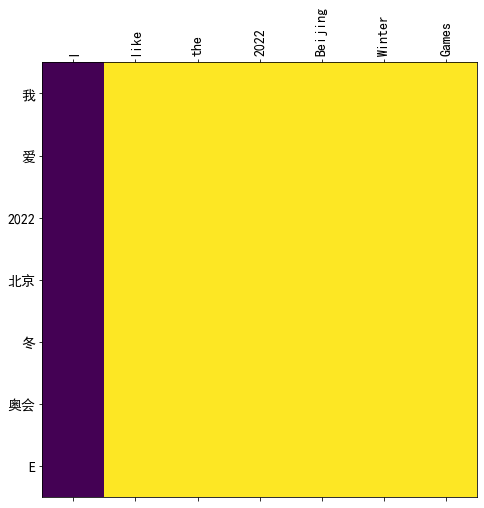

first head of last state dec_self_attns


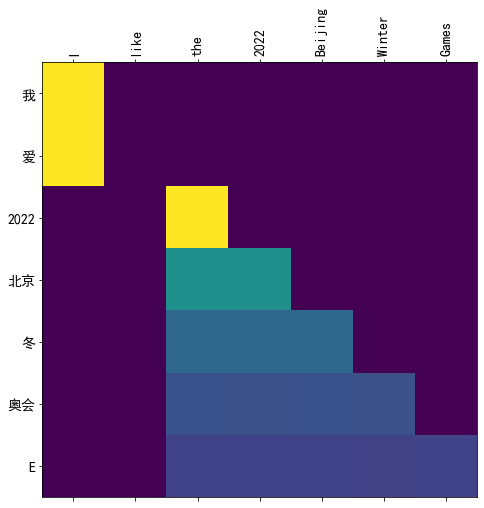

first head of last state dec_enc_attns


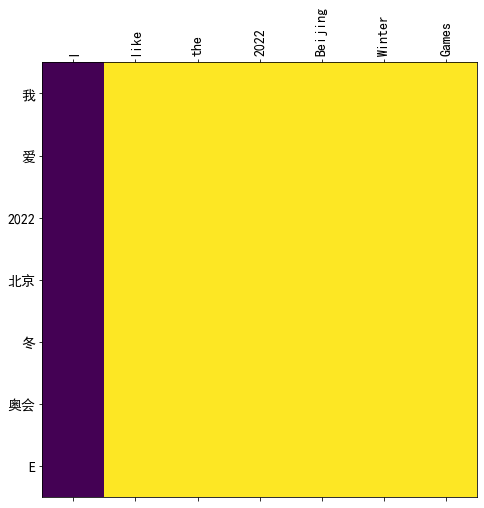

In [13]:
import warnings
warnings.filterwarnings("ignore")

model = Transformer()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

enc_inputs, dec_inputs, target_batch = make_batch(sentences)

for epoch in range(20):
    optimizer.zero_grad()
    outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs)
    loss = criterion(outputs, target_batch.contiguous().view(-1))
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
    loss.backward()
    optimizer.step()

# Test
predict, _, _, _ = model(enc_inputs, dec_inputs)
predict = predict.data.max(1, keepdim=True)[1]
print(sentences[0], '->', [number_dict[n.item()] for n in predict.squeeze()])

print('first head of last state enc_self_attns')
showgraph(enc_self_attns)

print('first head of last state dec_self_attns')
showgraph(dec_self_attns)

print('first head of last state dec_enc_attns')
showgraph(dec_enc_attns)

至此，我们已经初步了解了Transformer模型的原理和应用，下节课我们一起来看看基于Transformer模型Encoder的模型——bert